In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import confusion_matrix, accuracy_score

In [7]:
train_df=pd.read_csv("train.csv")

In [8]:
print("shape of train and test set :"+ str(train_df.shape))

shape of train and test set :(42000, 785)


In [9]:
train_df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
y = train_df['label']
X = train_df.drop("label",axis=1)

C:\Users\pavik\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


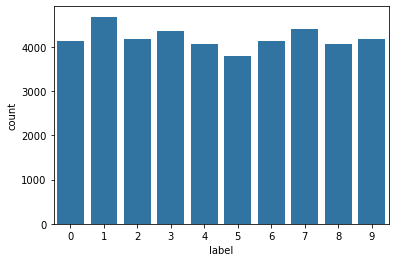

In [11]:
sns.countplot(y, color = sns.color_palette()[0]);

we can see here almost all labels  appear more than 3000

let's plot the images

C:\Users\pavik\AppData\Local\Temp/ipykernel_11104/3301684301.py:4: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(num_images/10,10,digit_num+1) #create subplots


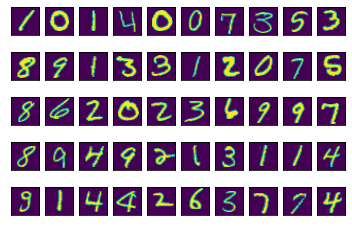

In [12]:
def show_images(num_images):
    if num_images % 10 == 0 and num_images <= 100:
        for digit_num in range(0,num_images): 
            plt.subplot(num_images/10,10,digit_num+1) #create subplots
            mat_data = X.iloc[digit_num].values.reshape(28,28)  #reshape images
            plt.imshow(mat_data) #plot the data
            plt.xticks([]) #removes numbered labels on x-axis
            plt.yticks([]) #removes numbered labels on y-axis
show_images(50)

#### Lets chech the accuracy of the decision tree on classification of the mnist data set before using the principal componet analysis technique to reduce dimensionality


Input Shape: (28140, 784)

Accuracy: 84.31%

[[1224    5   11   15   10   19   18   10   16    5]
 [   2 1420   20   15   12   13    6    7   15   10]
 [  16   31 1157   32   19   17   27   50   49   16]
 [  15   16   55 1143   15   91    8   47   44   37]
 [   5    9   21   14 1145    8   16    8   54   78]
 [  20   14   26   58   16  913   36   26   43   53]
 [  23    8   20   13   32   31 1210    3   49    8]
 [  11   13   46   12   21   10    1 1304   13   49]
 [  15   32   38   54   23   31   24   11 1054   52]
 [  10    5   25   29   60   22    7   35   40 1115]]


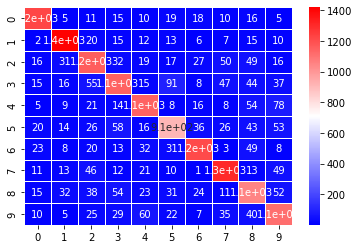

In [13]:
def fit_decision_tree_classifier(X, y, print_output=True):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                        test_size=0.33, 
                                                        random_state=42)

    clf = DecisionTreeClassifier(max_depth=10)

    clf.fit(X_train, y_train)

    y_preds = clf.predict(X_test)

    acc = accuracy_score(y_test, y_preds)
    
    if print_output == True:
        mat = confusion_matrix(y_test, y_preds)
        sns.heatmap(mat, annot=True, cmap='bwr', linewidths=.5)

        print('\nInput Shape: {}'.format(X_train.shape))
        print('\nAccuracy: {:2.2%}\n'.format(acc))
        print(mat)
    
    return acc
fit_decision_tree_classifier(X, y);

The dicision tree showing pretty good result. let's see after the using the pca

This function transforms the data using PCA to create n_components and provides the results of the transformation back.

In [14]:
def do_pca(n_components, data):
    X = StandardScaler().fit_transform(data)
    pca = PCA(n_components)
    X_pca = pca.fit_transform(X)
    return pca, X_pca

As a first pass, do PCA on just the two first principal components. So, we are fitting the exact samedecision tree classifier on much lower-dimensional data.

In [15]:
pca, X_pca = do_pca(2, X)

In [16]:
pca.explained_variance_ratio_

array([0.05747953, 0.04111691])

we will visualize the image of the dataset after using the pca

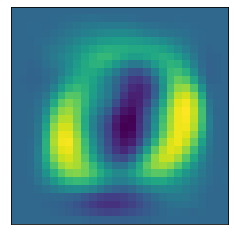

In [17]:
def plot_component(pca, comp):
    if comp <= len(pca.components_):
        mat_data = np.asmatrix(pca.components_[comp]).reshape(28,28)  #reshape images
        plt.imshow(mat_data); #plot the data
        plt.xticks([]) #removes numbered labels on x-axis
        plt.yticks([]) #removes numbered labels on y-axis   
plot_component(pca, 0)

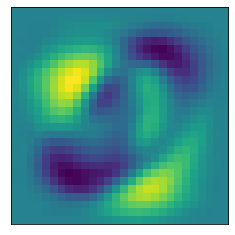

In [18]:
plot_component(pca, 1)

let's see the accuracy of the decision tree for  with 2 pca components


Input Shape: (28140, 2)

Accuracy: 35.35%

[[ 831    0  255   15   16   29  168    0   19    0]
 [   0 1307    4    1   10   36   26   50   30   56]
 [ 174    3  531  144  130   59  259   21   57   36]
 [  44   14  322  166  211  102  280   77  123  132]
 [  37   48  186  165  249   62  197  123   58  233]
 [  32   16  195   96  137  240  310   10  129   40]
 [ 185   27  372   55   63  159  436    1   82   17]
 [   2   73   55   86  167   23   81  529   59  405]
 [  36   34  201  123  173  166  265   39  192  105]
 [  14  103   61  116  210   27   91  271   37  418]]


0.3534632034632035

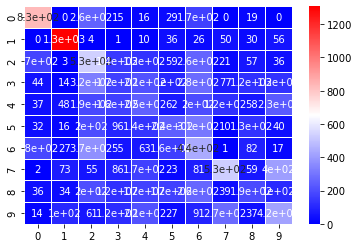

In [19]:
fit_decision_tree_classifier(X_pca, y)

An accuracy around 35.39% indicates that just two principal components isn’t giving enough information to clearly identify the digits.

In order to see how the PCA components are separating out the digits, lets use the following helper function to plot the data in a 2 dimensional space to view separation.

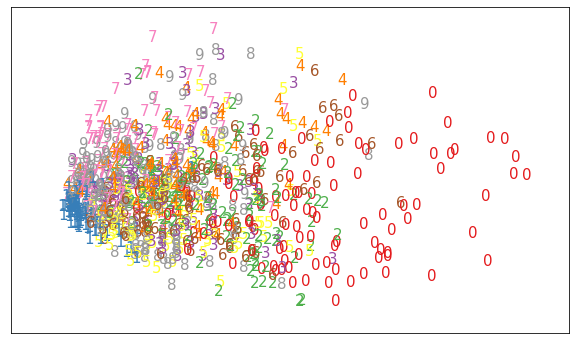

In [20]:
def plot_components(X, y):
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)
    plt.figure(figsize=(10, 6))
    for i in range(X.shape[0]):
        plt.text(X[i, 0], X[i, 1], str(y[i]), 
                 color=plt.cm.Set1(y[i]), 
                 fontdict={'size': 15})

    plt.xticks([]), plt.yticks([]), plt.ylim([-0.1,1.1]), plt.xlim([-0.1,1.1])
plot_components(X_pca[:1000], y[:1000])

We see that it does a reasonable job separating out zeros, sevens, and ones. But, this is an indication of what we saw in the confusion matrix. The numbers are pretty jumbled.

#### Perform PCA and Gauge Max Accuracy
As a final step, iteratively check how many principal components would be required in order to reach a reasonable accuracy with the same decision tree classsifier

In [21]:
acc_list, pc_list = [], []
for pc in range(2,50):
    pca, X_pca = do_pca(pc, X)
    acc = fit_decision_tree_classifier(X_pca, y, print_output=False);
    acc_list.append(acc)
    pc_list.append(pc)

In [22]:
pca.components_

array([[-1.11022302e-16, -0.00000000e+00, -0.00000000e+00, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       [ 1.11022302e-16,  1.11022302e-16,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 2.77555756e-16, -1.11022302e-16,  1.11022302e-16, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       ...,
       [ 3.80226390e-19, -1.60651743e-17, -7.57169634e-17, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 3.68811132e-17, -1.66905989e-17, -6.29915109e-17, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 2.11496806e-17,  7.62280353e-18,  5.75610768e-17, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00]])

In [23]:
pca.explained_variance_ratio_

array([0.05747953, 0.04111691, 0.03782867, 0.02939862, 0.02556439,
       0.02229844, 0.01952552, 0.01771605, 0.0156266 , 0.01424956,
       0.01361009, 0.01222541, 0.01135736, 0.0111309 , 0.0105031 ,
       0.01012326, 0.00951303, 0.00934514, 0.00907259, 0.00885327,
       0.00838905, 0.00812025, 0.00775158, 0.00752305, 0.00727684,
       0.00698744, 0.00690423, 0.0066489 , 0.00630604, 0.00616224,
       0.00610854, 0.00596892, 0.00577215, 0.00573476, 0.00564026,
       0.00546128, 0.00538719, 0.00524088, 0.00504243, 0.00485266,
       0.00481401, 0.00474475, 0.00456326, 0.00454789, 0.0044698 ,
       0.0044363 , 0.00439489, 0.00434084, 0.00428252])

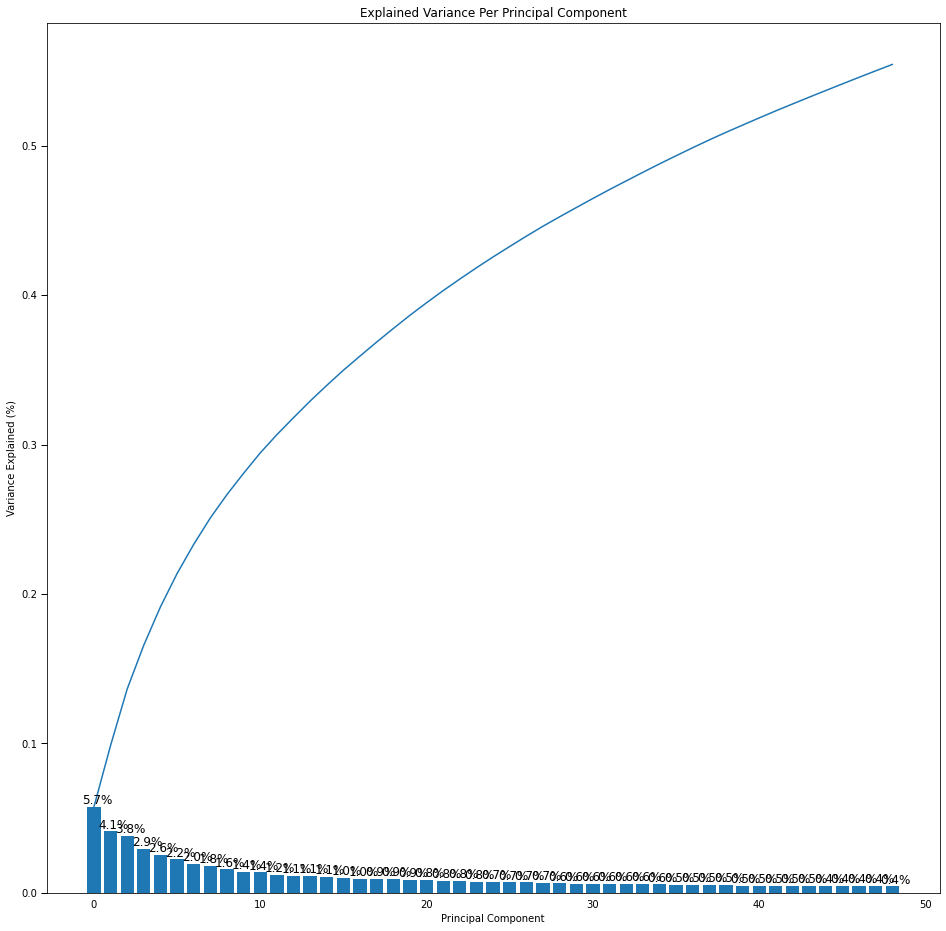

In [24]:
def scree_plot(pca):
    num_components = len(pca.explained_variance_ratio_)
    ind = np.arange(num_components)
    vals = pca.explained_variance_ratio_
 
    plt.figure(figsize=(16, 16))
    ax = plt.subplot(111)
    cumvals = np.cumsum(vals)
    ax.bar(ind, vals)
    ax.plot(ind, cumvals)
    for i in range(num_components):
        ax.annotate(r"%s%%" % ((str(round(vals[i]*100,1))[:3])), (ind[i]+0.2, vals[i]), 
                    va="bottom", 
                    ha="center", 
                    fontsize=12)
 
    ax.xaxis.set_tick_params(width=0)
    ax.yaxis.set_tick_params(width=1, length=6)
 
    ax.set_xlabel("Principal Component")
    ax.set_ylabel("Variance Explained (%)")
    plt.title('Explained Variance Per Principal Component')
scree_plot(pca)

Each of the bars represents the amount of variability explained by each component. So you can see the first component explains 5.7% of the variability in the image data. The second explains 4.1% of the variability and so on.

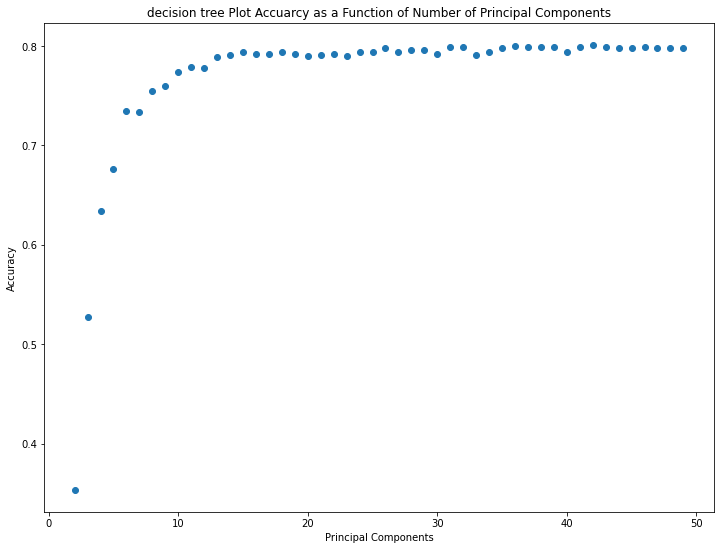

In [25]:
plt.figure(figsize=[12,9])
plt.scatter(pc_list, acc_list)
plt.title('decision tree Plot Accuarcy as a Function of Number of Principal Components')
plt.xlabel('Principal Components')
plt.ylabel('Accuracy');

In [26]:
np.max(acc_list), pc_list[np.where(acc_list == np.max(acc_list))[0][0]]

(0.8010822510822511, 42)

the maximum accuracy attained is80.08% with 44 principal components. Beyond this peak, additional principal components appear to mostly contribute noise.
Note that 44 principal component columns is a significant reduction in dataset complexity from the original 784 pixel columns!
from 15 -50 almost every component has the same accuracy in the range of 78.5-80%. so we will choose 16 components to build the model
#### lets build the model of the decision tree for pca with 16componets:

In [27]:
pca, X_pca = do_pca(16, X)


Input Shape: (28140, 16)

Accuracy: 78.73%

[[1143    1   26   11   13   54   16    7   46   16]
 [   1 1415   22   11    4   16    7    8   29    7]
 [  15    4 1084   64   46   13   41   15  109   23]
 [  12   15   70 1075    6  104    9   25  133   22]
 [  13    5   42   13 1006   23   27   15   33  181]
 [  23   15   26  104   13  818   21   11  129   45]
 [  24    5   49   14   19   22 1213    1   48    2]
 [   7   23   34   17   22   13    2 1167   49  146]
 [  13   14   64   79   15  103    4   16  966   60]
 [  14   13   10   24   93   23    7  102   37 1025]]


0.7873015873015873

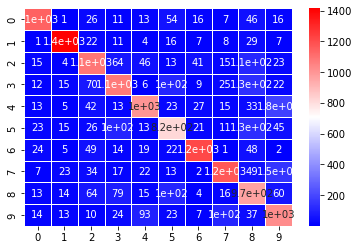

In [28]:
fit_decision_tree_classifier(X_pca, y)

#### Here we obtained the accuracy of 78.81%